# Analysis on the Karate Club Network

Qing Du, Jiahao He

In [1]:
import scipy.io
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
mat = scipy.io.loadmat('karate.mat')
A = mat['A'].astype('int')
C = mat['c0'].reshape(-1)
V = np.array(range(len(A)))+1
C0 = V[C==0]
C1 = V[C==1]
print(len(C0), len(C1))

17 17


In [2]:
np.argsort(A.sum(-1))

array([11, 16, 26, 22, 21, 20, 18, 17, 14, 12, 15,  9, 19,  4, 10, 28, 24,
       25,  7, 30, 29,  6,  5, 27,  8, 13, 23,  3, 31,  1,  2, 32,  0, 33])

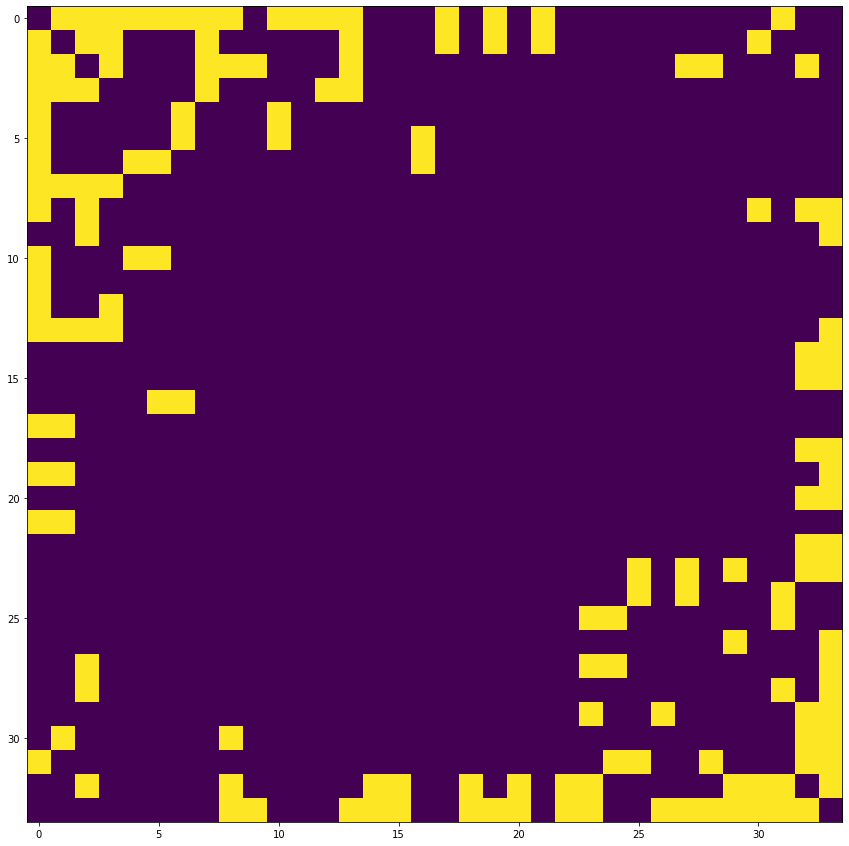

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(A)
plt.savefig('adjacet.png')

In [4]:
G=nx.Graph()
for i,a in enumerate(A):
    G.add_node(V[i])
    for j in range(i):
        if a[j] == 1:
            G.add_edge(V[i],V[j])

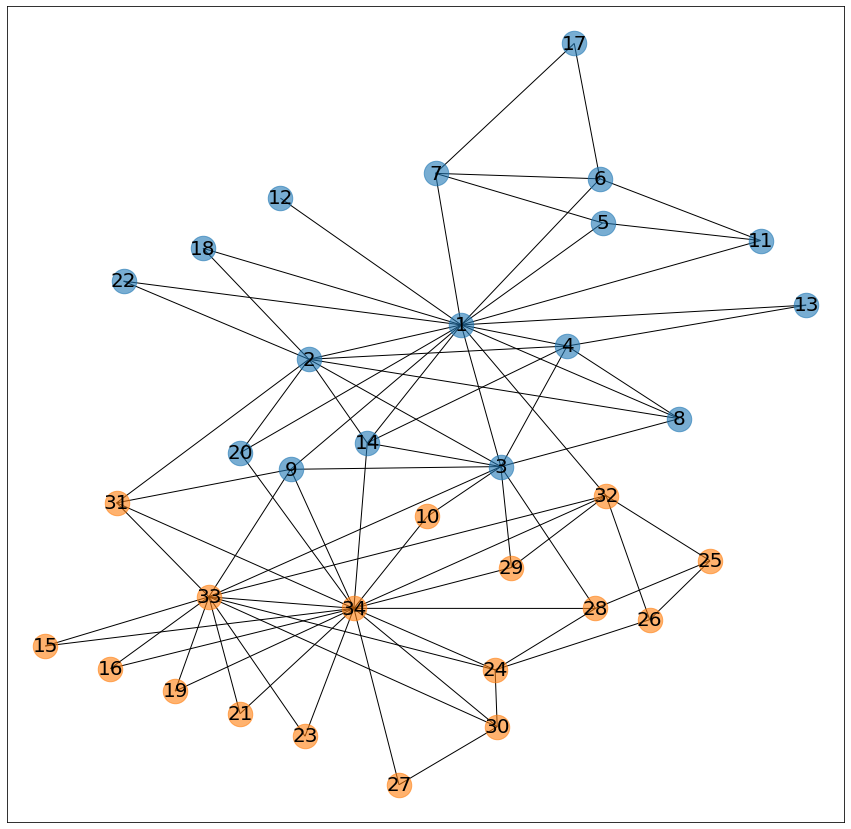

In [5]:
plt.figure(figsize=(15,15))
pos = nx.kamada_kawai_layout(G)
pos[4][1] +=0.05
pos[8][1] -=0.1
pos[20][0] +=0.04
pos[20][1] -=0.04
left = pos[16]
right = pos[23]
pos[15] = left
pos[16] = 0.75*left + 0.25* right
pos[19] = 0.5*left + 0.5*right
pos[21] = 0.25*left + 0.75*right
pos[33][0] -=0.1
pos[10] = (pos[3] + pos[34])/2 + [0, 0.05]
pos[29] += [-0.1,0.05]
pos[28] += [-0.1,-0.05]
pos[25] += [-0.25,0.07]
pos[24] += [-0.17,0.03]
pos[26] += [-0.3,-0.2]
nx.draw_networkx_nodes(G,pos,nodelist=C0, node_color='C0',node_size=600, alpha=0.6)
nx.draw_networkx_nodes(G,pos,nodelist=C1, node_color='C1',node_size=600, alpha=0.6)
nx.draw_networkx_labels(G,pos,font_size=20)
nx.draw_networkx_edges(G,pos)
plt.savefig('karate.png')

In [6]:
flowG=nx.Graph()
for i,a in enumerate(A):
    flowG.add_node(V[i])
    for j in range(i):
        if a[j] == 1:
            flowG.add_edge(V[i],V[j],capacity = 1)
min_cut, partition = nx.algorithms.flow.minimum_cut(flowG,1,34)
max_flow, flow = nx.algorithms.flow.maximum_flow(flowG,1,34)

In [7]:
mc_dict = np.zeros((len(V),len(V)))
nc_dict = np.zeros((len(V),len(V)))
pt_dict = dict([])
for u in flowG.nodes:
    for v in flowG.nodes:
        if u == v:continue
        mc, pt = nx.algorithms.flow.minimum_cut(flowG, u, v)
        mc_dict[u-1,v-1] = mc
        nc_dict[u-1,v-1] = mc/(min(len(pt[0]), len(pt[1])))

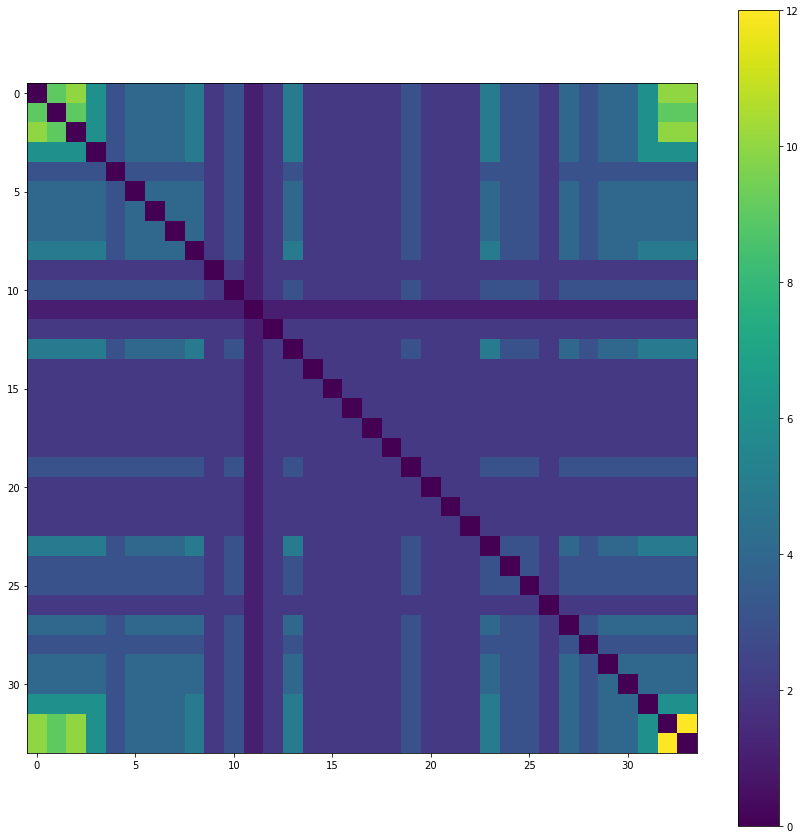

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(mc_dict)
plt.colorbar()
plt.savefig('mc.png')

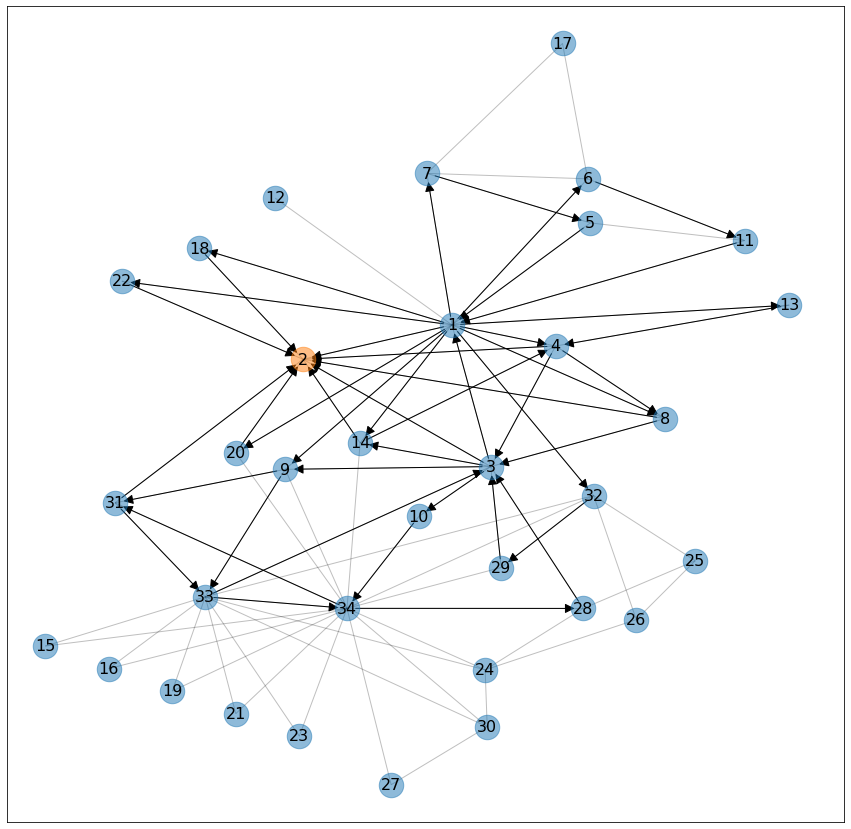

In [9]:
plt.figure(figsize=(15,15))
min_cut, partition = nx.algorithms.flow.minimum_cut(flowG,1,2)
max_flow, flow = nx.algorithms.flow.maximum_flow(flowG,1,2)
nx.draw_networkx_nodes(G,pos,nodelist=partition[0], node_size=600, node_color='C0', alpha=0.5)
nx.draw_networkx_nodes(G,pos,nodelist=partition[1], node_size=600, node_color='C1', alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=16)
nx.draw_networkx_edges(G,pos,alpha=0.25)
flowDiG = nx.DiGraph()
for i,a in enumerate(A):
    flowDiG.add_node(V[i])
for u in flow.keys():
    for v in flow[u].keys():
        if flow[u][v] > 0:
            nx.draw_networkx_edges(flowDiG,pos,edgelist=[(u,v)], arrowsize = 20)
plt.savefig("max_min_cut.png")

0.4685252267013921


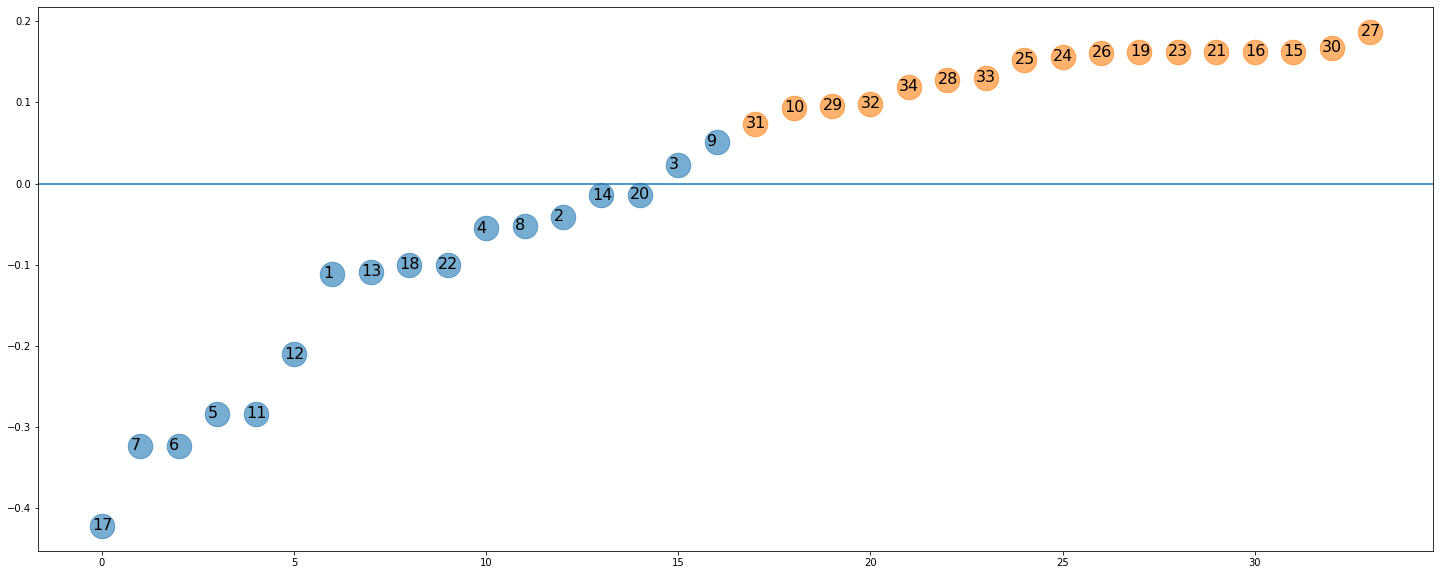

In [10]:
D = np.diag(A.sum(-1))
L = D-A
L_eigval, L_eigvec = np.linalg.eig(L)
# print(L_eigval, L_eigvec[0][:3])
sorting = np.argsort(L_eigval)
L_eigval = L_eigval[sorting]
L_eigvec = L_eigvec[:,sorting]
# print(L_eigval, L_eigvec[0][:3])
# plt.plot(L_eigval)
Fiedler = L_eigvec[:,1]
Fiedler_sorting = np.argsort(Fiedler)
Fd_med = np.median(Fiedler)
Fd0 = V[Fiedler < Fd_med]
Fd1 = V[Fiedler >= Fd_med]

C0_Fied = ([V[j] for j in Fiedler_sorting if V[j] in C0],
           [Fiedler[j] for j in Fiedler_sorting if V[j] in C0],
           [j for j in range(len(V)) 
            if V[Fiedler_sorting[j]] in C0]
          )
C1_Fied = ([V[j] for j in Fiedler_sorting if V[j] in C1],
           [Fiedler[j] for j in Fiedler_sorting if V[j] in C1],
           [j for j in range(len(V)) 
            if V[Fiedler_sorting[j]] in C1]
          )

print(L_eigval[1])
fig,ax = plt.subplots(figsize=(25,10))
_ = ax.scatter(C0_Fied[2], C0_Fied[1], s=600, alpha=0.6)
_ = ax.scatter(C1_Fied[2], C1_Fied[1], s=600, alpha=0.6)
for j in range(len(V)):
    ax.annotate(V[Fiedler_sorting[j]],
                (j-0.25, Fiedler[Fiedler_sorting[j]]-0.005),
                size=16)
_ = ax.axhline(0)
plt.savefig('Fiedler.png')

0.13227232922951615


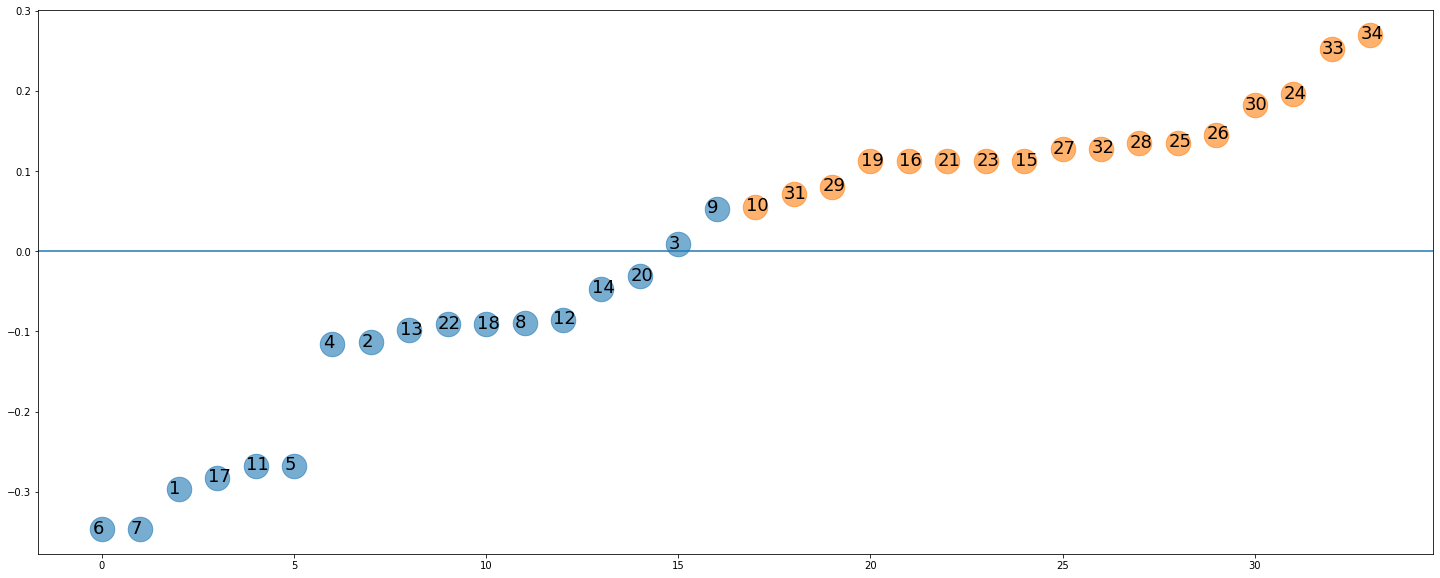

In [11]:
D = np.diag(A.sum(-1))
sym = np.sqrt(np.linalg.inv(D))
norm_L =  sym @ L @ sym
norm_L_eigval, norm_L_eigvec = np.linalg.eig(norm_L)
# print(L_eigval, L_eigvec[0][:3])
normed_sorting = np.argsort(norm_L_eigval)
norm_L_eigval = norm_L_eigval[normed_sorting]
norm_L_eigvec = norm_L_eigvec[:,normed_sorting]
#plt.imshow(norm_L_eigvec.T @ norm_L @ norm_L_eigvec)
#print(np.diag(norm_L_eigvec.T @ norm_L @ norm_L_eigvec))
# print(L_eigval, L_eigvec[0][:3])
# plt.plot(L_eigval)
Cheeger = norm_L_eigvec[:,1]
Cheeger_sorting = np.argsort(Cheeger)
Ch_med = np.median(Cheeger)
Ch0 = V[Cheeger < Ch_med]
Ch1 = V[Cheeger >= Ch_med]

C0_Chee = ([V[j] for j in Cheeger_sorting if V[j] in C0],
           [Cheeger[j] for j in Cheeger_sorting if V[j] in C0],
           [j for j in range(len(V)) 
            if V[Cheeger_sorting[j]] in C0]
          )

C1_Chee = ([V[j] for j in Cheeger_sorting if V[j] in C1],
           [Cheeger[j] for j in Cheeger_sorting if V[j] in C1],
           [j for j in range(len(V)) 
            if V[Cheeger_sorting[j]] in C1]
          )
print(norm_L_eigval[1])
fig,ax = plt.subplots(figsize=(25,10))
_ = ax.scatter(np.array(C0_Chee[2]), C0_Chee[1], s=600, alpha=0.6)
_ = ax.scatter(np.array(C1_Chee[2]), C1_Chee[1], s=600, alpha=0.6)
for j in range(len(V)):
    if j%2==0:
        delta = -0.005
    else:
        delta = -0.005
    ax.annotate(V[Cheeger_sorting[j]],
                (j-0.25, Cheeger[Cheeger_sorting[j]]+delta),
                size=18)
_ = ax.axhline(0)
plt.savefig('Cheeger.png')

In [12]:
P = np.linalg.inv(D) @ A
constants = np.zeros(len(V))
constants[-1] = 1
station_matrix = np.ones((len(V), len(V)))
station_matrix[:,:-1] = (np.identity(len(V)) - P)[:, :-1]
pi = constants @ np.linalg.inv(station_matrix)
d = A.sum(-1)
pi*sum(d),d

(array([16.,  9., 10.,  6.,  3.,  4.,  4.,  4.,  5.,  2.,  3.,  1.,  2.,
         5.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  5.,  3.,  3.,
         2.,  4.,  3.,  4.,  4.,  6., 12., 17.]),
 array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
         2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17]))

In [13]:
# Solve the Dirichlet boundary problem
Dirichlet_matrix = np.identity(len(V)-2)
Dirichlet_matrix -= P[1:33, 1:33]
Dirichlet_constants = P[1:33, -1]
q_partial = np.linalg.inv(Dirichlet_matrix) @ Dirichlet_constants
q = np.append([0], q_partial)
q = np.append(q, [1])
q0 = V[q <= 0.5]
q1 = V[q > 0.5]

0.13227232922951615


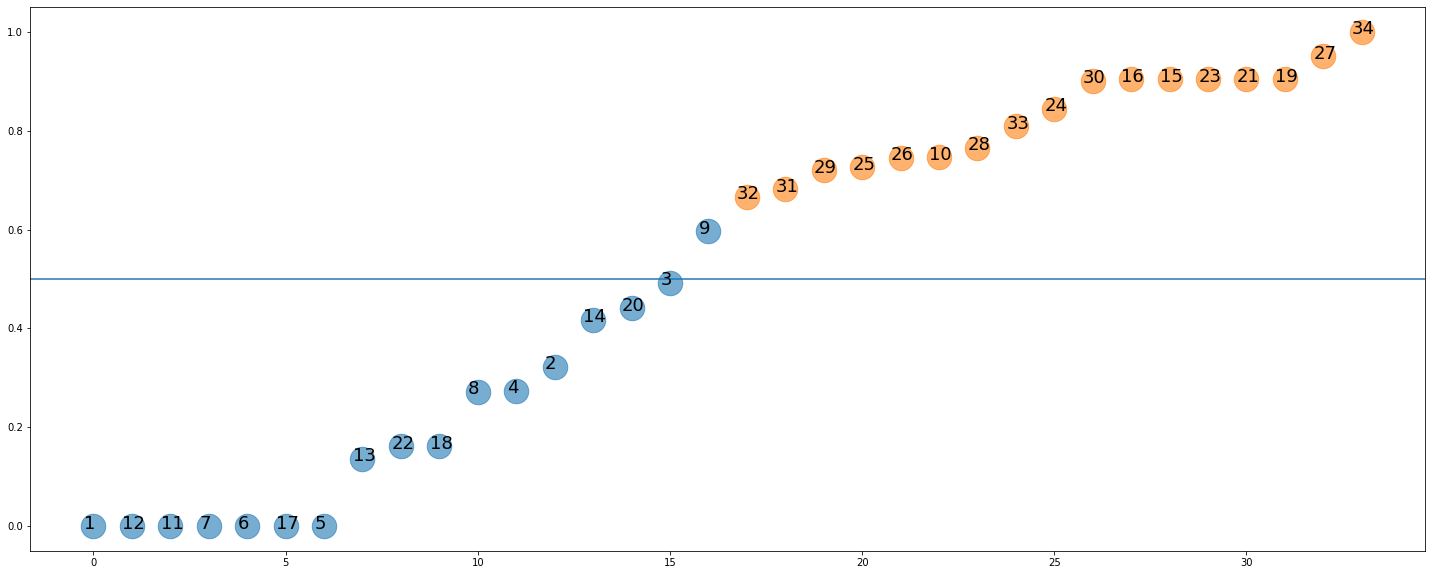

In [14]:
q_sorting = np.argsort(q)
C0_q = ([V[j] for j in q_sorting if V[j] in C0],
           [q[j] for j in q_sorting if V[j] in C0],
           [j for j in range(len(V))
            if V[q_sorting[j]] in C0]
          )

C1_q = ([V[j] for j in q_sorting if V[j] in C1],
           [q[j] for j in q_sorting if V[j] in C1],
           [j for j in range(len(V))
            if V[q_sorting[j]] in C1]
          )
print(norm_L_eigval[1])
fig,ax = plt.subplots(figsize=(25,10))
_ = ax.scatter(np.array(C0_q[2]), C0_q[1], s=600, alpha=0.6)
_ = ax.scatter(np.array(C1_q[2]), C1_q[1], s=600, alpha=0.6)
for j in range(len(V)):
    if j%2==0:
        delta = -0.005
    else:
        delta = -0.005
    ax.annotate(V[q_sorting[j]],
                (j-0.25, q[q_sorting[j]]+delta),
                size=18)
_ = ax.axhline(0.5)
plt.savefig('q.png')

In [15]:
J = np.zeros((len(V), len(V)))
for i in range(len(V)):
    for j in range(len(V)):
        if i != j:
            J[i,j] = pi[i] * (1 - q[i]) * P[i,j] *q[j]
J_eff = np.zeros((len(V), len(V)))
for i in range(len(V)):
    for j in range(len(V)):
        J_eff[i,j] = max(J[i,j] - J[j,i], 0)

In [16]:
T = np.zeros(len(V))
for i in range(len(V)):
    if i==0:
        T[i] = sum([J_eff[i,j] for j in range(len(V))])
    elif i==33:
        T[i] = sum([J_eff[j,i] for j in range(len(V))])
    else:
        T[i] = sum([J_eff[i,j] for j in range(len(V))])

In [17]:
Flux = nx.DiGraph()
for i in range(len(V)):
    Flux.add_node(V[i])
    for j in range(len(V)):
        if J_eff[i,j] > 0 :
            Flux.add_edge(V[i],V[j])

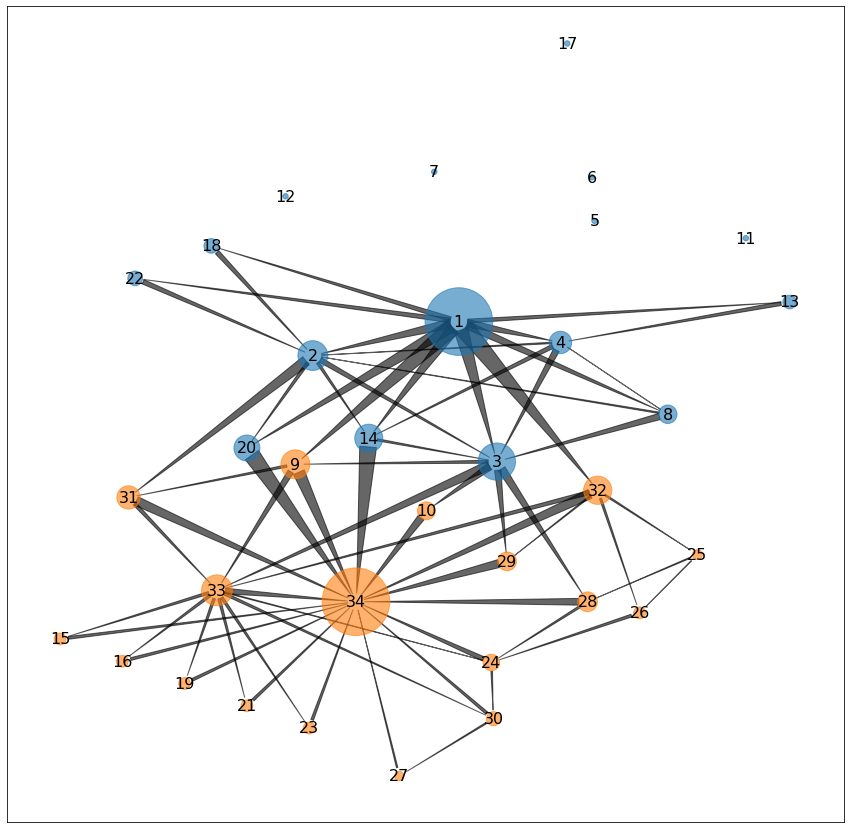

In [18]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(Flux, pos, nodelist=q0, node_size = 180000*T[q0-1]+30, node_color = 'C0', alpha=0.6)
nx.draw_networkx_nodes(Flux, pos, nodelist=q1, node_size = 180000*T[q1-1]+30, node_color = 'C1', alpha=0.6)
for e in Flux.edges:
    i,j = e[0]-1, e[1]-1
    nx.draw_networkx_edges(Flux, pos, edgelist=[e],  alpha=0.6, arrowstyle='wedge', arrowsize=J_eff[i,j]*15000)
    
_ =nx.draw_networkx_labels(G,pos,font_size=16)
plt.savefig('rw.png')

In [19]:
h = -(np.diag(D)) + np.random.randn(len(V))/100
gradient_flow = nx.DiGraph()
for v in V:
    gradient_flow.add_node(v)
    for u in G.neighbors(v):
        if h[v-1] < h[u-1]:
            gradient_flow.add_edge(u,v)
h_sorting = np.argsort(h)
colors = dict([])
C = dict([])
B = dict([])
Att = dict([])
G_k = G.copy()
for k in range(len(V)):
    C[k] = set([])
    B[k] = set([])
    for idx in h_sorting:
        if V[idx] not in G_k.nodes():
            continue
        N = set([])
        for j in G_k.neighbors(V[idx]):
            if h[j-1] < h[idx]:
                N.add(j)
        if len(N) == 0:
            C[k].add(V[idx])
            colors[V[idx]] = V[idx]
            Att[V[idx]] = set()
        else:
            contained_color = set([colors[v] for v in N if v in colors.keys()])
#             print(contained_color)
#             inp = input()
            if len(contained_color) == 1:
                colors[V[idx]] = contained_color.pop()
                Att[colors[V[idx]]].add(V[idx])
            else:
                B[k].add(V[idx])
    if len(B[k]) == 0:
        break
    G_k = G.subgraph(B[k])

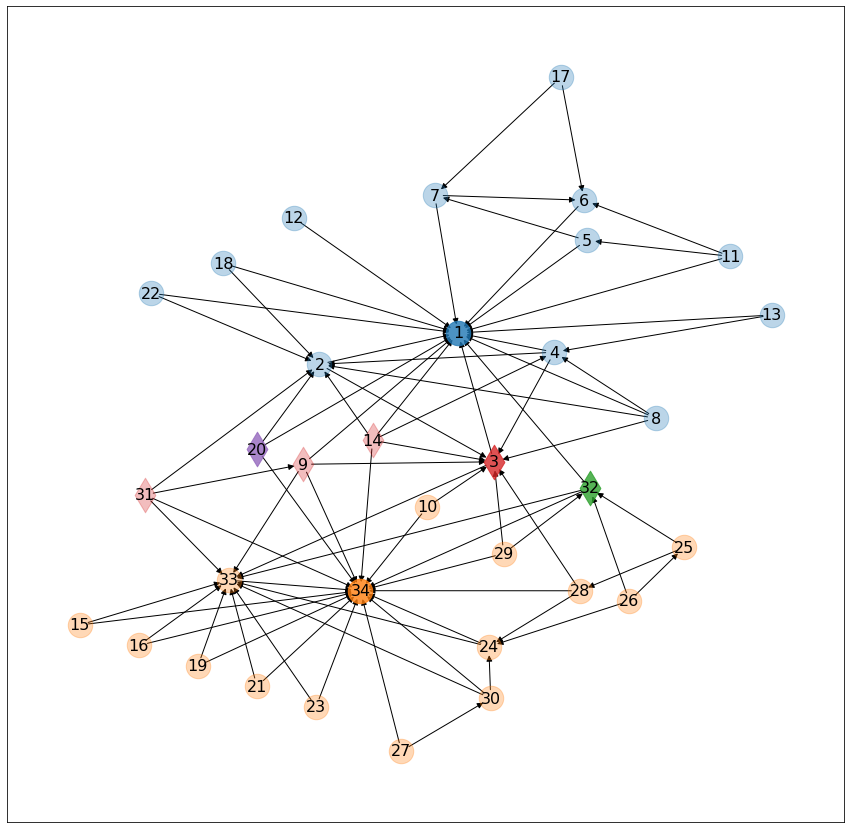

In [20]:
shape = 'od'
counter = 0
plt.figure(figsize=(15,15))
for k in range(len(C)):
    for v in C[k]:
        node_color = f'C{counter}'
        counter+=1
        nx.draw_networkx_nodes(G,pos,nodelist=[v],
                               node_shape = shape[k],
                              node_color = node_color,
                              node_size=600,
                              alpha=0.8)
        nx.draw_networkx_nodes(G,pos,nodelist=Att[v],
                               node_shape = shape[k],
                              node_color = node_color,
                              node_size=600,
                              alpha = 0.3)
        
_ = nx.draw_networkx_edges(gradient_flow,pos,
#                           arrowstyle='wedge',
                          arrowsize=12)
_ = nx.draw_networkx_labels(G,pos, font_size=16)
plt.savefig("decomposition.png")